## Score Distributions from RAGAS Metrics

In [1]:
import matplotlib.pyplot as plt
import os
import polars as pl

In [2]:
DATA_DIR = "../data"
REPORTS_DIR = os.path.join(DATA_DIR, "reports")

data = {}
add_qid = True
for rfn in os.listdir(REPORTS_DIR):
    netric_name = None
    with open(os.path.join(REPORTS_DIR, rfn), "r", encoding="utf-8") as fin:
        for line in fin:
            if line.startswith("#"):
                _, metric_name = line.strip().split("\t")
                metric_name = metric_name.lower()
                continue
            qid, score = line.strip().split("\t")
            score = float(score)
            if add_qid:
                if "qid" not in data.keys():
                    data["qid"] = [int(qid)]
                else:
                    data["qid"].append(int(qid))
            if metric_name not in data.keys():
                data[metric_name] = [float(score)]
            else:
                data[metric_name].append(float(score))
    add_qid = False

data.keys()

dict_keys(['qid', 'faithfulness', 'answer_similarity_col', 'context_relevance', 'answer_correctness', 'context_recall', 'context_utilization', 'context_precision', 'answer_similarity_cos', 'answer_relevance'])

In [3]:
metrics_df = pl.DataFrame(data)
metrics_df.head()

qid,faithfulness,answer_similarity_col,context_relevance,answer_correctness,context_recall,context_utilization,context_precision,answer_similarity_cos,answer_relevance
i64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1,0.1,0.962,0.118,0.609,0.0,0.217,0.0,0.803,0.77
2,0.883,0.977,0.149,0.625,0.475,0.571,0.243,0.901,0.857
3,0.025,0.963,0.072,0.836,1.567,0.1,0.1,0.802,0.858
4,0.0,0.958,0.119,0.571,0.0,0.1,0.0,0.83,0.868
5,0.25,0.968,0.085,0.903,0.05,1.0,0.053,0.826,0.82


### Distribution of Faithfulness

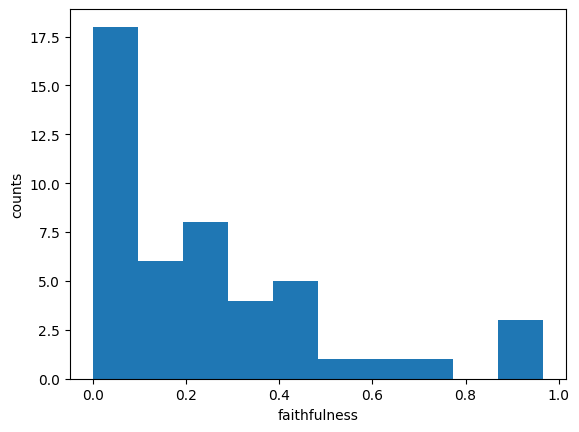

In [4]:
def plot_hist(df, col_name):
    plt.hist(df[col_name], bins=10)
    plt.xlabel(col_name)
    plt.ylabel("counts")
    _ = plt.show()

plot_hist(metrics_df, "faithfulness")

### Distribution of Answer Relevance

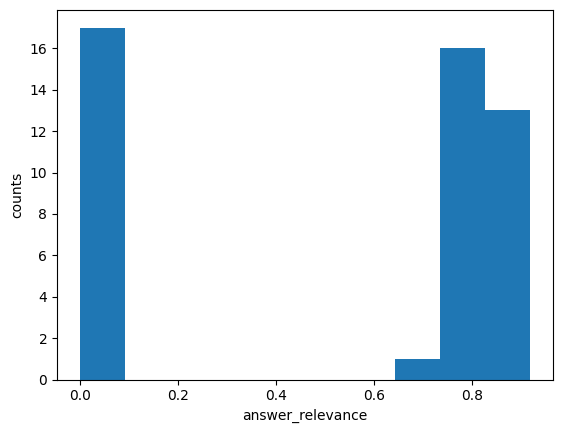

In [5]:
plot_hist(metrics_df, "answer_relevance")

### Distribution of Context Precision

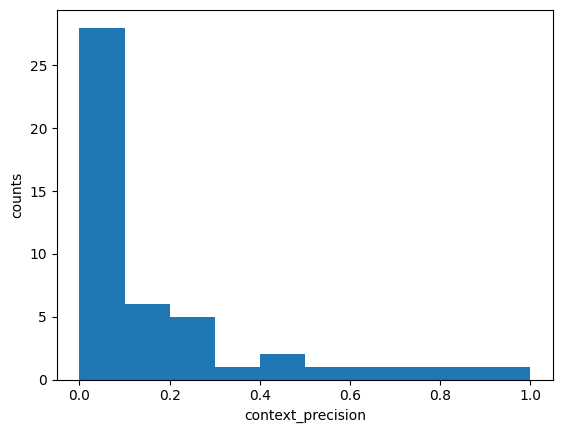

In [6]:
plot_hist(metrics_df, "context_precision")

### Distribution of Context Relevance

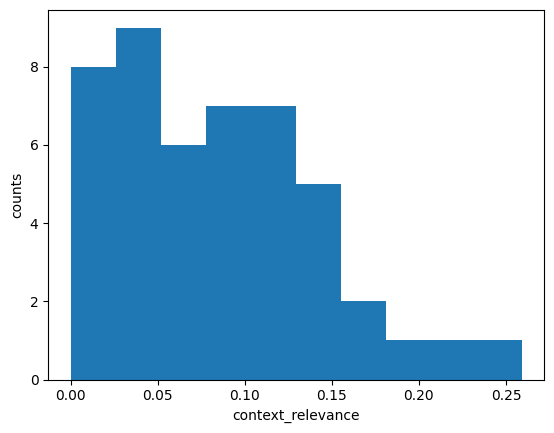

In [7]:
plot_hist(metrics_df, "context_relevance")

### Distrubution of Context Utilization

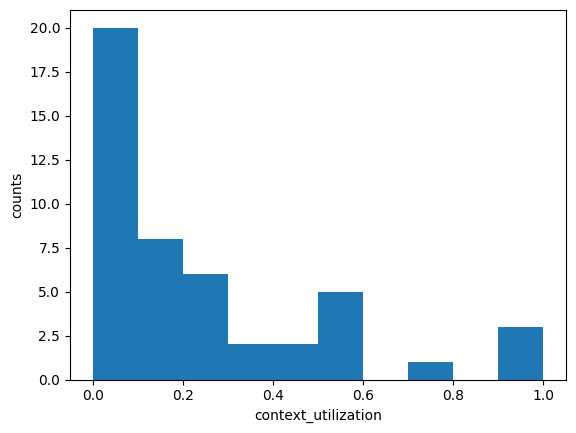

In [8]:
plot_hist(metrics_df, "context_utilization")

### Distribution of Context Recall

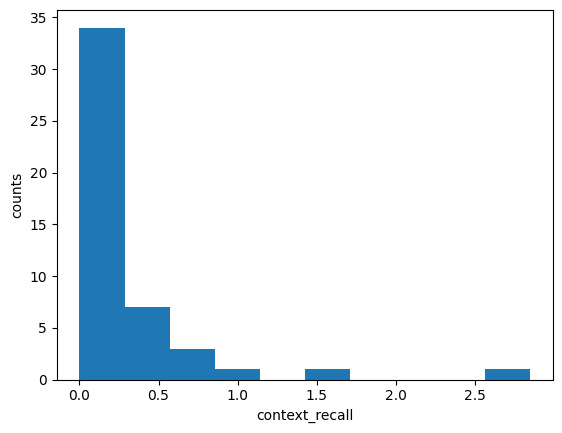

In [9]:
plot_hist(metrics_df, "context_recall")

### Distribution of Amswer Similarity (Cosine)

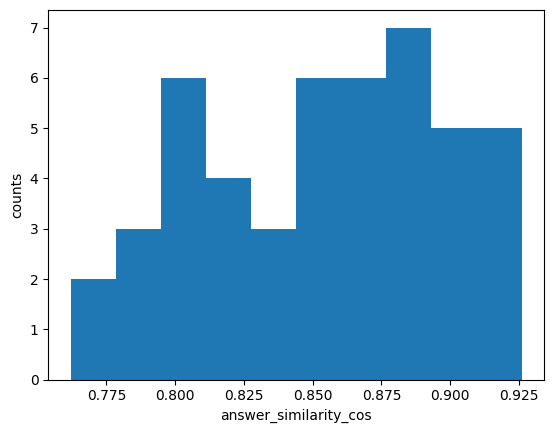

In [10]:
plot_hist(metrics_df, "answer_similarity_cos")

### Distribution of Answer Similarity (ColBERT)

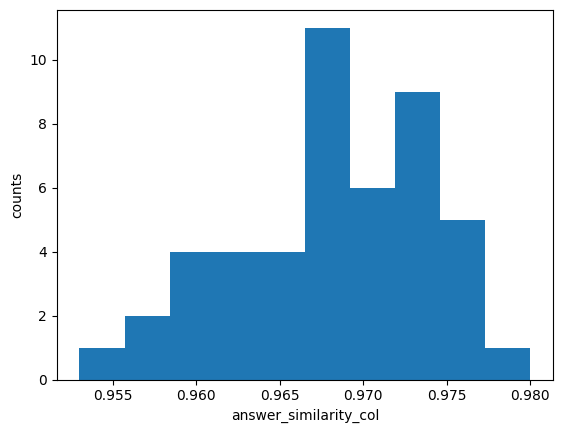

In [11]:
plot_hist(metrics_df, "answer_similarity_col")

### Distribution of Answer Correctness

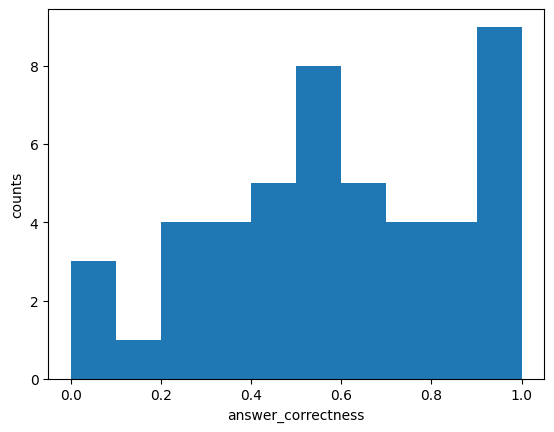

In [12]:
plot_hist(metrics_df, "answer_correctness")